<a href="https://colab.research.google.com/github/vicente-gonzalez-ruiz/medical_imaging/blob/main/notebooks/JPEG2000_add_metadata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sunpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.4 MB/s eta 0:00:00


In [2]:
!pip install reproject

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.2/195.2 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.9/378.9 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 4.0 MB/s eta 0:00:00


In [3]:
!pip install mpl_animators

In [4]:
!pip install glymur

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 16.7 MB/s eta 0:00:00


Original Metadata:
('meta': ' ')
('fits': ' ')
('simple': '1')
('bitpix': '16')
('naxis': '2')
('naxis1': '4096')
('naxis2': '4096')
('extend': '1')
('origin': 'SDO')
('date': '2025-08-31T00:09:21.000')
('telescop': 'SDO')
('instrume': 'AIA_2')
('date-obs': '2025-08-31T00:00:09.632')
('t_obs': '2025-08-31T00:00:11.082')
('tobsstep': '1.0')
('tobsepoc': '1977.01.01_00:00:00.000_TAI')
('camera': '2')
('img_type': 'LIGHT')
('exptime': '2.900771')
('expsdev': '0.00011100901')
('int_time': '3.15625')
('wavelnth': '211')
('waveunit': 'angstrom')
('wave_str': '211_THIN')
('fsn': '324923689')
('fid': '0')
('lvl_num': '1.5')
('quallev0': '0')
('quality': '1073741824')
('totvals': '16777216')
('datavals': '16777216')
('missvals': '0')
('percentd': '100.0')
('datamin': '-7.0')
('datamax': '5528')
('datamedn': '72')
('datamean': '139.36166')
('datarms': '218.75462')
('dataskew': '4.6000647')
('datakurt': '36.093014')
('oscnmean': '0')
('oscnrms': '0')
('flat_rec': 'aia.flatfield[:#748]')
('ctype1'

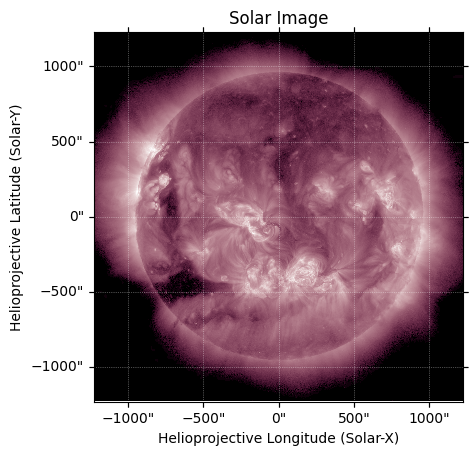

In [5]:
import sunpy.map
import matplotlib.pyplot as plt
import urllib.request

# Download a sample solar JP2 file (if you don't have one)
url = 'https://gs671-suske.ndc.nasa.gov/jp2/AIA/2025/08/31/211/2025_08_31__00_00_09_632__SDO_AIA_AIA_211.jp2'
filename = 'solar_image.jp2'
#filename = 'example.jp2'
urllib.request.urlretrieve(url, filename)

# Load the JP2 file into a sunpy Map object
solar_map = sunpy.map.Map(filename)

# Access the metadata
# The .meta attribute is a dictionary-like object
print("Original Metadata:")
print(solar_map.meta)

# You can access specific keys like a standard Python dictionary
print(f"\nInstrument: {solar_map.meta['INSTRUME']}")
print(f"Date of observation: {solar_map.meta['DATE-OBS']}")
print(f"Telescope: {solar_map.meta['TELESCOP']}")

# The Map object also provides convenient properties for common metadata
print(f"Wavelength: {solar_map.wavelength}")
print(f"Observer Location: {solar_map.observer_coordinate}")

# You can also plot the map
solar_map.plot()
plt.title('Solar Image')
plt.show()

In [6]:
# Modify metadata
# You can update existing keys or add new ones
solar_map.meta['TELESCOP'] = 'Modified Telescope'
solar_map.meta['NEW_KEY'] = 'This is a new metadata entry'

# Save the modified map to a new JP2 file
output_filename = 'solar_image_modified_metadata.jp2'
solar_map.save(output_filename, filetype='jp2')

print(f"\nModified map saved to: {output_filename}")

# Verify the metadata in the new file
print("\nMetadata from the new file:")
modified_map = sunpy.map.Map(output_filename)
print(modified_map.meta['TELESCOP'])
print(modified_map.meta['NEW_KEY'])


Modified map saved to: solar_image_modified_metadata.jp2

Metadata from the new file:
Modified Telescope
This is a new metadata entry
